<a href="https://colab.research.google.com/github/Anya232536/project_ml/blob/main/ML_pandas_Belenok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

In [ ]:
data = pd.read_excel('end_seminar.xlsx')
data.tail(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


Исследование данных

In [ ]:
#Уникальные пользователи из групп 18-го года набора
import numpy as np
data_18 = data[data['18_group'].notna()]
len(data_18.groupby('id'))


213

In [ ]:
#Уникальные пользователи из групп 17-го года набора

data_17 = data[data['17_group'].notna()]
len(data_17.groupby('id'))

134

In [ ]:
data_unique =data.drop_duplicates(subset='id')
data_percentile = data_unique.groupby('percentile').count()[['id']]
data_percentile[data_percentile['id']>1]

#уникальные студенты (2 студента) с равным перцентилем есть (перцентиль = 0)

,id
percentile,
0.0,2


In [ ]:
data.isna().sum()
# в данных пропуски есть, в колонках 18_group(138), is_mi(343), is_first_time(2), 17_group(223), blended(223), is_ml_student(304)

,0
timestamp,0
id,0
rating,0
18_group,138
is_mi,343
fall_1,0
fall_2,0
fall_3,0
spring_1,0
spring_2,0


Заполните пропуски пустой строкой для строковых колонок, нулём для числовых и False для булевых (постарайтесь избежать перечисления названий всех столбцов).

In [ ]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').fillna('')
data[data.select_dtypes(include='number').columns] = data.select_dtypes(include='number').fillna(0)
data[data.select_dtypes(include='boolean').columns] = data.select_dtypes(include='boolean').fillna(False)

In [ ]:
data.isna().sum()

,0
timestamp,0
id,0
rating,0
18_group,0
is_mi,0
fall_1,0
fall_2,0
fall_3,0
spring_1,0
spring_2,0


In [ ]:
print(len(data[data['is_first_time']=="Да"])/len(data)*100) #процент ответов Да ~85,3%
print(len(data[data['is_first_time']=="Нет"])/len(data)*100) #процент ответов Нет ~14,1%
print(len(data[data['is_first_time']==""])/len(data)*100) #процент ячеек без ответа ~0,6%

85.3185595567867
14.127423822714682
0.554016620498615


Если есть повторные обращения студентов, оставим только самую позднюю версию.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [ ]:
data_last = data.sort_values(by='timestamp', ignore_index = True )
data_last = data_last.drop_duplicates(subset='id', keep = 'last').reset_index(drop=True)
data_last


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,996,0.0,0.0,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,0.963768,172.0,DevOps,0.0
1,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0
2,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0
3,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0
4,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0
343,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0
344,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0
345,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0


Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [ ]:
data_blende=data_last[data_last['blended'] != ''].groupby('blended').count()[['id']]
data_blende
#blended-курсы: DevOps(87 студентов - наибольшее количество студентов), Введение в дифференциальную геометрию (15 студентов), Соревновательный анализ данных (32 студента)

,id
blended,
DevOps,87
Введение в дифференциальную геометрию,15
Соревновательный анализ данных,32


In [ ]:
mean_rating = data_last[data_last['blended'] != ''][['blended', 'rating']].groupby('blended').mean()
mean_rating[mean_rating['rating'] == mean_rating['rating'].max()]
# на курсе Введение в дифференциальную геометрию студенты с самым высокий рейтингом (1210,7)

,rating
blended,
Введение в дифференциальную геометрию,1210.733333


Поиск студентов с абсолютно одинаковыми предпочтениями по всем курсам.


In [ ]:
grouped_courses = data_last.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'])['id'].count().reset_index()
grouped_courses.loc[((grouped_courses['id']>1) & (grouped_courses['blended']=='')), 'blended']='0'
grouped_courses[grouped_courses['id']>1]

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,id
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,0,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,0,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,0,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,0,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,0,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,0,2


Поиск курсов по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [ ]:
course_fall_1 = data_last[['fall_1', '18_group', '17_group']].groupby('fall_1').sum()
course_fall_1[(course_fall_1['18_group']!=0) & (course_fall_1['17_group']!=0)]

,18_group,17_group
fall_1,,
Statistical Learning Theory,2568.0,1902.0
Безопасность компьютерных систем,14943.0,5058.0
Высокопроизводительные вычисления,3129.0,4199.0
Моделирование временных рядов,3880.0,175.0
Принятие решений в условиях риска и неопределённости,559.0,350.0
Сбор и обработка данных с помощью краудсорсинга,4624.0,1553.0


In [ ]:
course_fall_2 = data_last[['fall_2', '18_group', '17_group']].groupby('fall_2').sum()
course_fall_2[(course_fall_2['18_group']!=0) & (course_fall_2['17_group']!=0)]

,18_group,17_group
fall_2,,
Statistical Learning Theory,3294.0,1555.0
Безопасность компьютерных систем,5153.0,3137.0
Высокопроизводительные вычисления,5704.0,3319.0
Моделирование временных рядов,2584.0,2261.0
Принятие решений в условиях риска и неопределённости,1301.0,346.0
Сбор и обработка данных с помощью краудсорсинга,5739.0,3994.0


In [ ]:
course_fall_3 = data_last[['fall_3', '18_group', '17_group']].groupby('fall_3').sum()
course_fall_3[(course_fall_3['18_group']!=0) & (course_fall_3['17_group']!=0)]

,18_group,17_group
fall_3,,
Statistical Learning Theory,2394.0,1731.0
Безопасность компьютерных систем,4047.0,1563.0
Высокопроизводительные вычисления,3875.0,2090.0
Моделирование временных рядов,3699.0,4349.0
Принятие решений в условиях риска и неопределённости,2202.0,349.0
Сбор и обработка данных с помощью краудсорсинга,4079.0,4159.0


In [ ]:
np.array(course_fall_3[(course_fall_3['18_group']!=0) & (course_fall_3['17_group']!=0)].index)
#осенние курсы, на которые записались студеныт 17 и 18 года набора: Statistical Learning Theory, Безопасность компьютерных систем, Высокопроизводительные вычисления,
#Моделирование временных рядов, Принятие решений в условиях риска и неопределённости, Сбор и обработка данных с помощью краудсорсинга

array(['Statistical Learning Theory', 'Безопасность компьютерных систем',
       'Высокопроизводительные вычисления',
       'Моделирование временных рядов',
       'Принятие решений в условиях риска и неопределённости',
       'Сбор и обработка данных с помощью краудсорсинга'], dtype=object)

In [ ]:
course_spring_1 = data_last[['spring_1', '18_group', '17_group']].groupby('spring_1').sum()
course_spring_1[(course_spring_1['18_group']!=0) & (course_spring_1['17_group']!=0)]

,18_group,17_group
spring_1,,
Численные методы,1102.0,175.0


In [ ]:
course_spring_2 = data_last[['spring_2', '18_group', '17_group']].groupby('spring_2').sum()
course_spring_2[(course_spring_1['18_group']!=0) & (course_spring_1['17_group']!=0)]

,18_group,17_group
spring_2,,
Численные методы,4055.0,873.0


In [ ]:
course_spring_3 = data_last[['spring_3', '18_group', '17_group']].groupby('spring_3').sum()
course_spring_3[(course_spring_1['18_group']!=0) & (course_spring_1['17_group']!=0)]

,18_group,17_group
spring_3,,
Численные методы,3683.0,1912.0


In [ ]:
np.array(course_spring_3[(course_spring_3['18_group']!=0) & (course_spring_3['17_group']!=0)].index)
#весенние курсы, на которые записались студены 17 и 18 года набора: Численные методы

array(['Численные методы'], dtype=object)

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
np.array(course_fall_3[~((course_fall_3['18_group']!=0) & (course_fall_3['17_group']!=0))].index)
#осенние курсы, на которые записались только студенты 17 или 18 года набора: Анализ неструктурированных данных, Байесовские методы машинного обучения,
#Глубинное обучение в обработке звука, Матричные вычисления, Теория баз данных, Язык SQL

array(['Анализ неструктурированных данных',
       'Байесовские методы машинного обучения',
       'Глубинное обучение в обработке звука', 'Матричные вычисления',
       'Теория баз данных', 'Язык SQL'], dtype=object)

In [ ]:
np.array(course_spring_3[~((course_spring_3['18_group']!=0) & (course_spring_3['17_group']!=0))].index)
#весенние курсы, на которые записались только студенты 17 или 18 года набора: 'Анализ данных в бизнесе', 'Генеративные модели в машинном обучении',
#'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерное зрение', 'Компьютерные сети', 'Конфликты и кооперация',
#'Машинное обучение 2', 'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением', 'Проектирование и разработка высоконагруженных сервисов',
#'Промышленное программирование на языке Java', 'Символьные вычисления', 'Системы баз данных'

array(['Анализ данных в бизнесе',
       'Генеративные модели в машинном обучении',
       'Дискретная оптимизация',
       'Дополнительные главы прикладной статистики',
       'Компьютерное зрение', 'Компьютерные сети',
       'Конфликты и кооперация', 'Машинное обучение 2',
       'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением',
       'Проектирование и разработка высоконагруженных сервисов',
       'Промышленное программирование на языке Java',
       'Символьные вычисления', 'Системы баз данных'], dtype=object)

### Визуализации и matplotlib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

График средних рейтингов по дням получения ответов (bar plot).

In [ ]:
data_plot=data_last[['timestamp', 'rating']]
rating_mean_data = data_plot.groupby(data_plot['timestamp'].dt.date).mean()[['rating']].reset_index()
rating_mean_data

,timestamp,rating
0,2020-05-14,1160.277778
1,2020-05-15,719.866667
2,2020-05-16,736.400000
3,2020-05-17,915.027027
4,2020-05-18,827.352679
5,2020-05-19,761.142857
6,2020-05-20,689.500000
7,2020-05-21,584.000000
8,2020-05-23,1080.500000
9,2020-05-24,670.500000


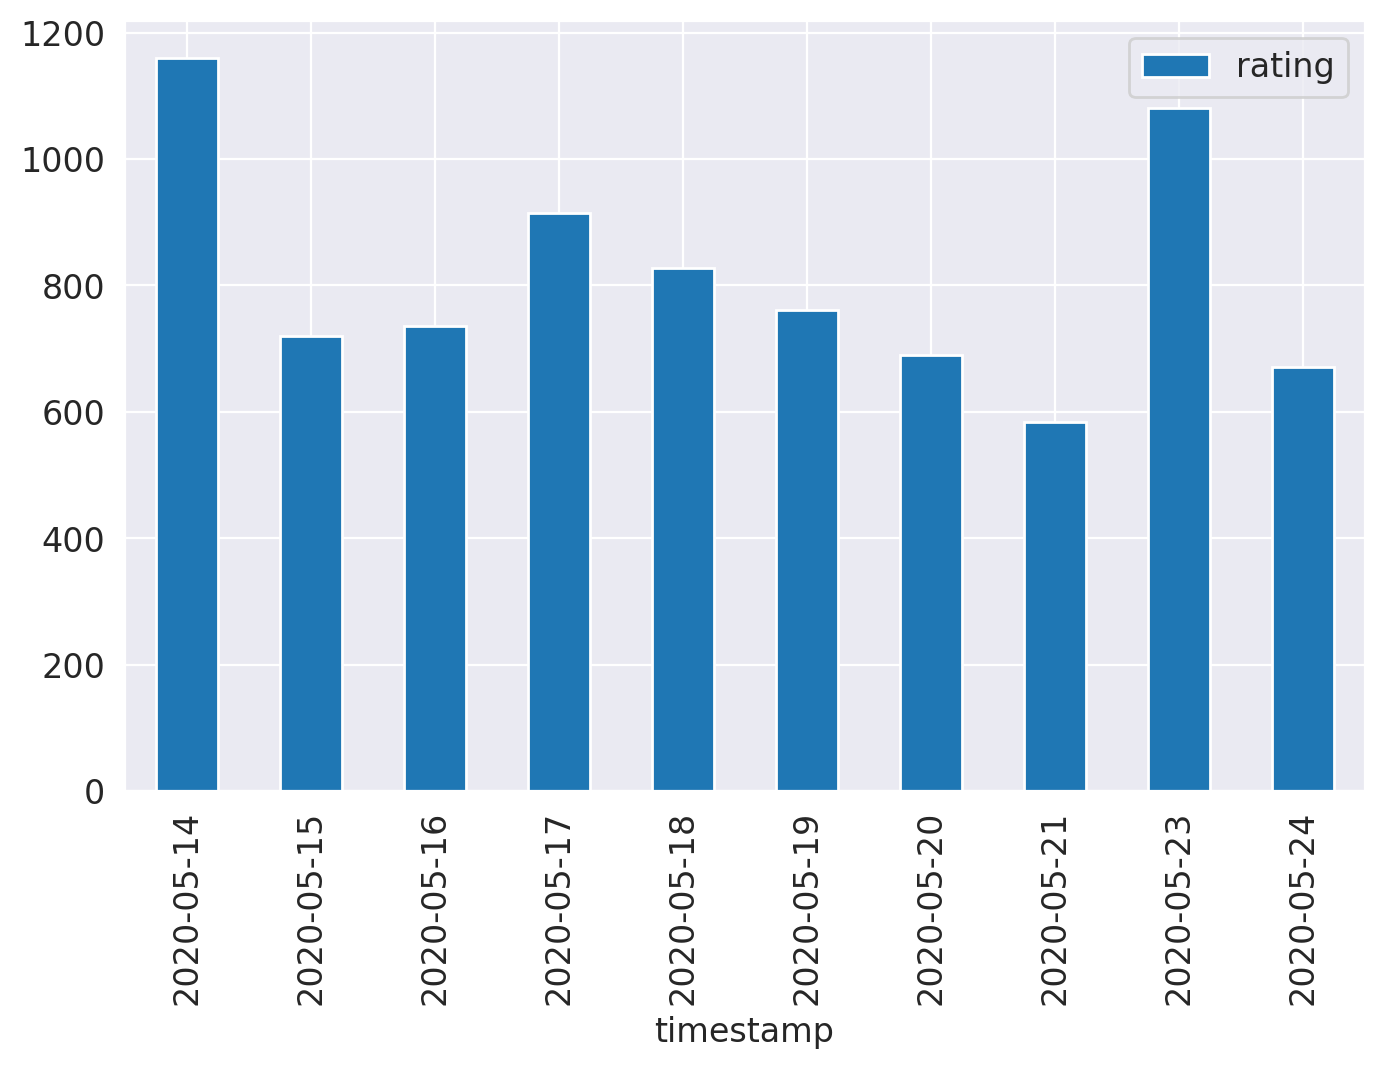

In [ ]:
ax = rating_mean_data.plot.bar(x='timestamp', y='rating')

Сохраните график в формате pdf (так он останется векторизованным).

In [ ]:
plt.savefig('rating_mean_data.pdf', format='pdf')

<Figure size 800x500 with 0 Axes>

### 2. Распределение студентов по курсам.

## 📌 **Алгоритм распределения студентов по курсам**:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

## ☝️ **Обращаем ваше внимание на следующие детали:**
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь `df.to_csv('solution.csv', index=None)`
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert data_last.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data_last.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
data_last['autumn'] = 1
data_last.loc[((data_last['17_group'] <= 173) & (data_last['17_group'] != 0)) | ((data_last['18_group']!=0) & (data_last['is_mi']!=0)), 'autumn'] = 2

data_last

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,autumn
0,2020-05-14 20:23:21.662,d555d2805e1d93d4f023e57dc4c8f403,996,0.0,0.0,Безопасность компьютерных систем,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,Компьютерное зрение,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...,Да,0.963768,172.0,DevOps,0.0,2
1,2020-05-14 20:47:13.833,253bbe1a2021d0404712a1e4acd22939,1106,0.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Statistical Learning Theory,Проектирование и разработка высоконагруженных ...,Численные методы,Методы сжатия и передачи медиаданных,Да,0.673913,176.0,DevOps,0.0,1
2,2020-05-14 20:52:42.734,881b1a6fda195b354ae2edb396a69f5d,1084,0.0,0.0,Безопасность компьютерных систем,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Генеративные модели в машинном обучении,Да,0.782609,172.0,DevOps,0.0,2
3,2020-05-14 21:03:02.916,5a9b8ac11ad05b39a58b0e04a263bf4c,1170,0.0,0.0,Глубинное обучение в обработке звука,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Обучение с подкреплением,Генеративные модели в машинном обучении,Да,0.442029,171.0,DevOps,0.0,2
4,2020-05-14 21:10:54.945,1bbbfae51794b83c769b634be8da7b8d,1078,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,Да,0.789855,176.0,DevOps,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-21 16:33:15.899,1341f488fae5f1ccf164960fd6506cd0,584,188.0,0.0,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.721973,0.0,,0.0,1
343,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0,1
344,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2
345,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,1


Проверка:

In [ ]:
col_name = 'autumn'    # insert your new column name as str

assert(data_last[data_last['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(data_last[data_last['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(data_last[data_last['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(data_last[data_last['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. Распределите студентов в соответствии с первым приоритетом

In [ ]:
df1 = data_last

In [ ]:
# 1 волна осень
res_fall = {
    'ID': [],
    'course1': [],
    'course2': [],
    'count': []
}
res_fall = pd.DataFrame(res_fall)
res_fall['ID'] = data_last['id']
res_fall['count'] = data_last['autumn']

res_fall['course2'] = res_fall['count'].apply(lambda x: '-' if x == 1 else None)
id_best =[]
id_worse=[]

data_last = data_last.sort_values(by='percentile')

fall = ['Statistical Learning Theory', 'Анализ неструктурированных данных', 'Высокопроизводительные вычисления', 'Байесовские методы машинного обучения', 'Безопасность компьютерных систем',
          'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов', 'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга',
          'Теория баз данных', 'Язык SQL']

for i in fall:
          if i in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
            df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index().head(60)
            id_best.append(df.iloc[0][['id']])
            id_worse.append(df.iloc[len(df)-1][['id']])
            res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
            res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
          if i in ['Байесовские методы машинного обучения', 'Безопасность компьютерных систем', 'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов',
                   'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Теория баз данных', 'Язык SQL']:
                   df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index().head(30)
                   #print(list(df))
                   res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
                   res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
                   id_best.append(df.iloc[0][['id']])
                   id_worse.append(df.iloc[len(df)-1][['id']])
          if i in ['Анализ неструктурированных данных']:
            df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index()
            res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
            res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
            id_best.append(df.iloc[0][['id']])
            id_worse.append(df.iloc[len(df)-1][['id']])



<ipython-input-33-2439694e05fb>:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Statistical Learning Theory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
df1['is_best'] = df1['id'].apply(lambda x: True if x in np.array(id_best) else None)
df1['is_worse'] = df1['id'].apply(lambda x: True if x in np.array(id_worse) else None)


In [ ]:
fir_col_name = 'is_best'    # insert name of your new column with is_first_place as str
last_col_name = 'is_worse'     # insert name of your new column with is_last_place as str


assert (df1[df1[fir_col_name].notna()][['id']].sort_values('id').reset_index(drop=True) ==
        check_df[check_df['is_first_place'].notna()][['id']].sort_values('id').reset_index(drop=True)).id.values.all()


assert((df1[df1[last_col_name].notna()][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. Проведите все три волны отбора студентов на курсы по выбору

In [ ]:
data1 = data_last

In [ ]:
data_last=data1

In [ ]:
data_last.loc[(data_last['fall_1']==data_last['fall_3']) & (data_last['fall_2']==data_last['fall_3']), 'fall_3']='???'
data_last.loc[(data_last['fall_1']==data_last['fall_2']), 'fall_2']='???'

In [ ]:
# 1 волна осень
res_fall = {
    'ID': [],
    'course1': [],
    'course2': [],
    'count': []
}
res_fall = pd.DataFrame(res_fall)
res_fall['ID'] = data_last['id']
res_fall['count'] = data_last['autumn']
res_fall['course2'] = res_fall['count'].apply(lambda x: '-' if x == 1 else None)
data_last = data_last.sort_values(by='percentile')
fall = ['Statistical Learning Theory', 'Анализ неструктурированных данных', 'Высокопроизводительные вычисления', 'Байесовские методы машинного обучения', 'Безопасность компьютерных систем',
          'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов', 'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга',
          'Теория баз данных', 'Язык SQL']
place=np.zeros(len(fall))

for i in fall:
          if i in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
            df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index().head(60)
            res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
            res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
          if i in ['Байесовские методы машинного обучения', 'Безопасность компьютерных систем', 'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов',
                   'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Теория баз данных', 'Язык SQL']:
                   df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index().head(30)
                   res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
                   res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
          if i in ['Анализ неструктурированных данных']:
            df = data_last.loc[(data_last['fall_1'] == i) | ((data_last['fall_2'] == i) & (data_last['autumn']==2))].reset_index()
            res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i
            res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values))) & (res_fall['count'] == 2)), 'course2'] = i
          place[np.where(np.array(fall) == i)] = len(df)


data_last = data_last.loc[~(data_last['id'].isin(res_fall.loc[(res_fall['course1'].notna()) & (res_fall['course2'].notna())]['ID'].values))].sort_values(by='percentile').reset_index()
#res_fall


<ipython-input-55-7b8dd8fa6f08>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Statistical Learning Theory' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_1'] == i]['id'].values))), 'course1'] = i


In [ ]:
# 2 волна осень
for i in fall:
  if i in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
    df = data_last.loc[((data_last['fall_2'] == i) & (data_last['autumn']==1)) | ((data_last['fall_3'] == i) & (data_last['autumn']==2))].reset_index().head(60 - int(place[np.where(np.array(fall) == i)[0][0]]))
    res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values) & (res_fall['count'] == 1) & (res_fall['course1'].isna())) | (res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['course1'].isna()) & (res_fall['count'] == 2))), 'course1'] = i
    res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values)) & (res_fall['course2'].isna()) & (res_fall['course1']!=i)) & (res_fall['count'] == 2)), 'course2'] = i
  if i in ['Байесовские методы машинного обучения', 'Безопасность компьютерных систем', 'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов',
           'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Теория баз данных', 'Язык SQL']:
           df = data_last.loc[((data_last['fall_2'] == i) & (data_last['autumn']==1)) | ((data_last['fall_3'] == i) & (data_last['autumn']==2))].reset_index().head(30 - int(place[np.where(np.array(fall) == i)[0][0]]))
           res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values) & (res_fall['count'] == 1))  | (res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['course1'].isna()) & (res_fall['count'] == 2))), 'course1'] = i
           res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values)) & (res_fall['course2'].isna()) & (res_fall['course1']!=i)) & (res_fall['count'] == 2)), 'course2'] = i

  if i in ['Анализ неструктурированных данных']:
          df = data_last.loc[((data_last['fall_2'] == i) & (data_last['autumn']==1)) | ((data_last['fall_3'] == i) & (data_last['autumn']==2))].reset_index()
          res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_2'] == i]['id'].values) & (res_fall['count'] == 1) ) | (res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['course1'].isna()) & (res_fall['count'] == 2))), 'course1'] = i
          res_fall.loc[(((res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values)) & (res_fall['course2'].isna()) & (res_fall['course1']!=i)) & (res_fall['count'] == 2)), 'course2'] = i
  place[np.where(np.array(fall) == i)] += len(df)


data_last = data_last.loc[(data_last['id'].isin(res_fall.loc[(res_fall['course1'].isna()) & (res_fall['count'] == 1)]['ID'].values))].sort_values(by='percentile').reset_index()


In [ ]:
# 3 волна осень
for i in fall:
  if i in ['Statistical Learning Theory', 'Высокопроизводительные вычисления']:
    df = data_last.loc[((data_last['fall_3'] == i) & (data_last['autumn']==1))].reset_index(drop = True).head(60 - int(place[np.where(np.array(fall) == i)[0][0]]))
    res_fall.loc[((res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['count'] == 1) & (res_fall['course1'].isna()))), 'course1'] = i
  if i in ['Байесовские методы машинного обучения', 'Безопасность компьютерных систем', 'Глубинное обучение в обработке звука', 'Матричные вычисления', 'Моделирование временных рядов',
           'Принятие решений в условиях риска и неопределённости', 'Сбор и обработка данных с помощью краудсорсинга', 'Теория баз данных', 'Язык SQL']:
           df = data_last.loc[((data_last['fall_3'] == i) & (data_last['autumn']==1))].reset_index(drop = True).head(30 - int(place[np.where(np.array(fall) == i)[0][0]]))
           res_fall.loc[(res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['count'] == 1) & (res_fall['course1'].isna())), 'course1'] = i
  if i in ['Анализ неструктурированных данных']:
          df = data_last.loc[((data_last['fall_3'] == i) & (data_last['autumn']==1))].reset_index(drop = True)
          res_fall.loc[(res_fall['ID'].isin(df.loc[df['fall_3'] == i]['id'].values) & (res_fall['count'] == 1) & (res_fall['course1'].isna())), 'course1'] = i

res_fall.loc[(res_fall['course1'].isna()), 'course1'] = "???"
res_fall.loc[(res_fall['course2'].isna()), 'course2'] = "???"
res_fall = res_fall.reset_index().drop(columns=['index', 'count'])


In [ ]:
res_fall.loc[(res_fall['course1'] == res_fall['course2']) & (res_fall['course1']!='???'), 'course2']=="???"
res_fall.to_csv('res_fall1.csv', index=None)

In [ ]:
res_fall.to_csv('res_fall1.csv', index=None)
pd.set_option('display.max_rows', None)
res_fall

,ID,course1,course2
0,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,-
1,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,Высокопроизводительные вычисления
2,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,-
3,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,-
4,86d929f6fd741e56e93cee5900298849,Сбор и обработка данных с помощью краудсорсинга,-
5,425c2a90f447620c9a1868e92f0a7af6,Сбор и обработка данных с помощью краудсорсинга,-
6,67e4ec4fe5c0601815692fbd6d403fb7,Байесовские методы машинного обучения,Глубинное обучение в обработке звука
7,723d5f32b699c971b4095a017c883ffa,Statistical Learning Theory,-
8,b3cbd3541c0cf66ff4eb2bc1596bb149,Байесовские методы машинного обучения,Statistical Learning Theory
9,bfe75c08c6b7e31d4e7d48c9c5fed69b,Безопасность компьютерных систем,-


### 4. Распределите таким же образом студентов еще и на весенние курсы по выбору.


In [ ]:
data_last=data1.drop(columns= ['autumn'])
data_last['spring'] = 1
data_last.loc[(data_last['17_group'] <= 173) & (data_last['17_group'] != 0), 'spring'] = 2

In [ ]:
# 1 волна весна
res_spring = {
    'ID': [],
    'course1': [],
    'course2': [],
    'count': []
}
res_spring = pd.DataFrame(res_spring)
res_spring['ID'] = data_last['id']
res_spring['count'] = data_last['spring']
res_spring['course2'] = res_spring['count'].apply(lambda x: '-' if x == 1 else None)
data_last = data_last.sort_values(by='percentile')
spring = ['Анализ данных в бизнесе', 'Генеративные модели в машинном обучении', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерное зрение', 'Компьютерные сети', 'Конфликты и кооперация',
        'Машинное обучение 2', 'Методы сжатия и передачи медиаданных', 'Обучение с подкреплением', 'Проектирование и разработка высоконагруженных сервисов',
        'Промышленное программирование на языке Java', 'Символьные вычисления', 'Системы баз данных', 'Численные методы']
place=np.zeros(len(spring))

data_last.loc[((data_last['is_ml_student'] == True) & (data_last['spring_1'] == 'Машинное обучение 2')), 'spring_1']=data_last['spring_2']
data_last.loc[((data_last['is_ml_student'] == True) & (data_last['spring_2'] == 'Машинное обучение 2')), 'spring_2']=data_last['spring_3']
data_last.loc[((data_last['is_ml_student'] == True) & (data_last['spring_3'] == 'Машинное обучение 2')), 'spring_3']='???'

data_last.loc[(data_last['spring_1']==data_last['spring_3']) & (data_last['spring_2']==data_last['spring_3']), 'spring_3']='???'
data_last.loc[(data_last['spring_1']==data_last['spring_2']), 'spring_2']='???'

for i in spring:
          if i in ['Обучение с подкреплением', 'Анализ данных в бизнесе']:
            df = data_last.loc[(data_last['spring_1'] == i) | ((data_last['spring_2'] == i) & (data_last['spring']==2))].reset_index().head(60)
            res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_1'] == i]['id'].values))), 'course1'] = i
            res_spring.loc[(((res_spring['ID'].isin(df.loc[df['spring_2'] == i]['id'].values))) & (res_spring['count'] == 2)), 'course2'] = i
          if i in ['Генеративные модели в машинном обучении', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерное зрение', 'Компьютерные сети', 'Конфликты и кооперация',
                   'Машинное обучение 2', 'Методы сжатия и передачи медиаданных', 'Проектирование и разработка высоконагруженных сервисов',
                   'Промышленное программирование на языке Java', 'Символьные вычисления', 'Системы баз данных', 'Численные методы']:
                    df = data_last.loc[(data_last['spring_1'] == i) | ((data_last['spring_2'] == i) & (data_last['spring']==2))].reset_index().head(30)
                    res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_1'] == i]['id'].values))), 'course1'] = i
                    res_spring.loc[(((res_spring['ID'].isin(df.loc[df['spring_2'] == i]['id'].values))) & (res_spring['count'] == 2)), 'course2'] = i
          place[np.where(np.array(spring) == i)] = len(df)

data_last = data_last.loc[~(data_last['id'].isin(res_spring.loc[(res_spring['course1'].notna()) & (res_spring['course2'].notna())]['ID'].values))].sort_values(by='percentile').reset_index()



<ipython-input-76-7aa0b5f93dca>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Анализ данных в бизнесе' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_1'] == i]['id'].values))), 'course1'] = i


In [ ]:
# 2 волна весна
for i in spring:
  if i in ['Обучение с подкреплением', 'Анализ данных в бизнесе']:
            df = data_last.loc[((data_last['spring_2'] == i) & (data_last['spring']==1)) | ((data_last['spring_3'] == i) & (data_last['spring']==2))].reset_index().head(60 - int(place[np.where(np.array(spring) == i)[0][0]]))
            res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_2'] == i]['id'].values) & (res_spring['count'] == 1)) | (res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values) & (res_spring['course1'].isna()) & (res_spring['count'] == 2))), 'course1'] = i
            res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values)) & (res_spring['course2'].isna()) & (res_spring['course1']!=i) & (res_spring['count'] == 2)), 'course2'] = i

  if i in ['Генеративные модели в машинном обучении', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерное зрение', 'Компьютерные сети', 'Конфликты и кооперация',
                   'Машинное обучение 2', 'Методы сжатия и передачи медиаданных', 'Проектирование и разработка высоконагруженных сервисов',
                   'Промышленное программирование на языке Java', 'Символьные вычисления', 'Системы баз данных', 'Численные методы']:
                    df = data_last.loc[((data_last['spring_2'] == i) & (data_last['spring']==1)) | ((data_last['spring_3'] == i) & (data_last['spring']==2))].reset_index().head(30 - int(place[np.where(np.array(spring) == i)[0][0]]))
                    res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_2'] == i]['id'].values) & (res_spring['count'] == 1)) | (res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values) & (res_spring['course1'].isna()) & (res_spring['count'] == 2))), 'course1'] = i
                    res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values)) & (res_spring['course2'].isna()) & (res_spring['course1']!=i) & (res_spring['count'] == 2)), 'course2'] = i

  place[np.where(np.array(spring) == i)] += len(df)

data_last = data_last.loc[(data_last['id'].isin(res_spring.loc[(res_spring['course1'].isna()) & (res_spring['course2']== '-')]['ID'].values))].sort_values(by='percentile').reset_index()


In [ ]:
# 3 волна весна
for i in spring:
  if i in ['Обучение с подкреплением', 'Анализ данных в бизнесе']:
    df = data_last.loc[((data_last['spring_3'] == i) & (data_last['spring']==1))].reset_index(drop=True).head(60 - int(place[np.where(np.array(spring) == i)[0][0]]))
    res_spring.loc[((res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values) & (res_spring['count'] == 1) & (res_spring['course1'].isna()))), 'course1'] = i
  if i in ['Генеративные модели в машинном обучении', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Компьютерное зрение', 'Компьютерные сети', 'Конфликты и кооперация',
           'Машинное обучение 2', 'Методы сжатия и передачи медиаданных', 'Проектирование и разработка высоконагруженных сервисов',
           'Промышленное программирование на языке Java', 'Символьные вычисления', 'Системы баз данных', 'Численные методы']:
           df = data_last.loc[((data_last['spring_3'] == i) & (data_last['spring']==1))].reset_index(drop=True).head(30 - int(place[np.where(np.array(spring) == i)[0][0]]))
           res_spring.loc[(res_spring['ID'].isin(df.loc[df['spring_3'] == i]['id'].values) & (res_spring['count'] == 1) & (res_spring['course1'].isna())), 'course1'] = i


res_spring.loc[(res_spring['course1'].isna()), 'course1'] = '???'
res_spring.loc[(res_spring['course2'].isna()), 'course2'] = '???'
res_spring = res_spring.reset_index().drop(columns=['index', 'count'])


In [ ]:
res_spring.to_csv('res_spring.csv', index=None)
res_spring

,ID,course1,course2
0,3e106aaef8b24dbb01319c73e14c2936,Дискретная оптимизация,-
1,3a7326c9e355a67d3805824ca34c4bc5,Символьные вычисления,Численные методы
2,e0ca1a9548af9a3f98428c62420aa484,Дискретная оптимизация,-
3,7fe7df0d207babbf30249b3063ac1f26,Проектирование и разработка высоконагруженных ...,-
4,86d929f6fd741e56e93cee5900298849,Дополнительные главы прикладной статистики,-
5,425c2a90f447620c9a1868e92f0a7af6,Промышленное программирование на языке Java,-
6,67e4ec4fe5c0601815692fbd6d403fb7,Обучение с подкреплением,Проектирование и разработка высоконагруженных ...
7,723d5f32b699c971b4095a017c883ffa,Дополнительные главы прикладной статистики,-
8,b3cbd3541c0cf66ff4eb2bc1596bb149,Символьные вычисления,Обучение с подкреплением
9,bfe75c08c6b7e31d4e7d48c9c5fed69b,Дискретная оптимизация,-
